Файл для создания и анализа финальной таблицы

In [6]:
import os
import sys
import glob
import shutil
import datetime
import platform
from functools import reduce

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

from astropy import units as u
from astropy.time import Time

from scipy import signal
from scipy.optimize import curve_fit
from scipy.integrate import simps

In [7]:
if 'Windows' in platform.platform() and '8.1' in platform.release():
    _ = "C:\\Users\\Andrey\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '7' in platform.release():
    _ = "E:\\Disk.Yandex\\3.Programing\\"
    DATA_DIR = "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '10' in platform.release():
    _ = "F:\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    ALL_DATA = "F:\\YandexDisk\\1.Работа\\Результаты обработки\\"
    DELIMITER = "\\"

elif 'Linux' in platform.platform() and '4.15.0' in platform.release():
    _ = "/home/andr/Yandex.Disk/3.Programing/"
    DATA_DIR = _ + "work/PulseViewer/pulsarsData/"
    PATTERN_DIR = _ + "/work/PulseViewer/frame_of_AP/patterns/"
    PACK_DIR = _ + "myPacks/"
    ALL_DATA = "/home/andr/Yandex.Disk/1.Работа/Результаты обработки/"
    DELIMITER = "/"

else:
    print('unknown system', platform.platform(), platform.release())

sys.path.append(PACK_DIR)
from PRAO import *

In [8]:
def flatter(data, polynomialOrder=15):

    ## Применяем медианную фильтрацию с максимальным шагом:
    res_filter = data # signal.medfilt(data, kernel_size=29)
    # Фитируем получившийся массив:
    xData = range(len(res_filter))
    yData = res_filter
    # curve fit the data
    fittedParameters = np.polyfit(xData, yData, polynomialOrder)
    xModel = np.linspace(min(xData), max(xData), len(xData))
    yModel = np.polyval(fittedParameters, xModel)

    return yModel

In [9]:
gp_table = pd.read_table('crab_gp_kaz_10_2010-2019_calib_dina_2020-03-11_corrected.csv', sep='\t')
crab_sessoins = pd.read_table('crab_obs_kaz_2010-2019_dina_2020-03-11.csv', sep='\t')

In [10]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1744.81864,42.117403,.\obs_data_real_calib\2010.02.13_obs_0531+21.csv,1,51612,269.37640,8.41850,63.16855,./results_set/dina_results/plots/2010.02.13_pl...,./results_set/dina_results/files/2010.02.13_pl...,0,0.572535
1,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1744.81864,42.117403,.\obs_data_real_calib\2010.02.13_obs_0531+21.csv,1,10666,181.67841,1.55705,5.30440,./results_set/dina_results/plots/2010.02.13_pl...,./results_set/dina_results/files/2010.02.13_pl...,0,0.295156
2,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1744.81864,42.117403,.\obs_data_real_calib\2010.02.13_obs_0531+21.csv,1,55277,177.38667,1.22180,2.80865,./results_set/dina_results/plots/2010.02.13_pl...,./results_set/dina_results/files/2010.02.13_pl...,0,0.307387
3,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1744.81864,42.117403,.\obs_data_real_calib\2010.02.13_obs_0531+21.csv,1,58464,171.78795,1.16965,1.81035,./results_set/dina_results/plots/2010.02.13_pl...,./results_set/dina_results/files/2010.02.13_pl...,0,-0.050457
4,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1744.81864,42.117403,.\obs_data_real_calib\2010.02.13_obs_0531+21.csv,1,26313,169.85448,1.20690,3.76225,./results_set/dina_results/plots/2010.02.13_pl...,./results_set/dina_results/files/2010.02.13_pl...,0,0.053619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13557,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1768.59862,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1,24414,532.10468,2.80865,10.62370,./results_set/dina_results/plots/2019.09.19_pl...,./results_set/dina_results/files/2019.09.19_pl...,0,0.540843
13558,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1768.59862,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1,6496,523.59962,3.59835,8.67925,./results_set/dina_results/plots/2019.09.19_pl...,./results_set/dina_results/files/2019.09.19_pl...,0,0.521735
13559,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1768.59862,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1,30819,518.70289,5.26715,10.51940,./results_set/dina_results/plots/2019.09.19_pl...,./results_set/dina_results/files/2019.09.19_pl...,0,0.614616
13560,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1768.59862,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1,18348,518.48746,5.20010,11.57730,./results_set/dina_results/plots/2019.09.19_pl...,./results_set/dina_results/files/2019.09.19_pl...,0,0.673698


In [11]:
#SKIP ZEROS_END
gp_table = gp_table.where(gp_table.zeros_ends == 0).dropna().reset_index(drop=True)

In [12]:
#SKIP PEARS < 0.6
gp_table = gp_table.where(gp_table.pears >= 0.5).dropna().reset_index(drop=True)

In [13]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430.0,34.0,1744.818640,42.117403,.\obs_data_real_calib\2010.02.13_obs_0531+21.csv,1.0,51612.0,269.376400,8.41850,63.16855,./results_set/dina_results/plots/2010.02.13_pl...,./results_set/dina_results/files/2010.02.13_pl...,0.0,0.572535
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1717.647895,36.229961,.\obs_data_real_calib\2010.09.04_obs_0531+21.csv,1.0,11420.0,176.650285,17.00090,30.15760,./results_set/dina_results/plots/2010.09.04_pl...,./results_set/dina_results/files/2010.09.04_pl...,0.0,0.738860
2,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1717.647895,36.229961,.\obs_data_real_calib\2010.09.04_obs_0531+21.csv,1.0,18010.0,158.318875,8.15030,39.28385,./results_set/dina_results/plots/2010.09.04_pl...,./results_set/dina_results/files/2010.09.04_pl...,0.0,0.671775
3,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1718.033010,41.160847,.\obs_data_real_calib\2010.09.05_obs_0531+21.csv,1.0,21354.0,411.753190,11.70395,49.80325,./results_set/dina_results/plots/2010.09.05_pl...,./results_set/dina_results/files/2010.09.05_pl...,0.0,0.914835
4,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1718.033010,41.160847,.\obs_data_real_calib\2010.09.05_obs_0531+21.csv,1.0,3063.0,228.012950,2.10090,32.54905,./results_set/dina_results/plots/2010.09.05_pl...,./results_set/dina_results/files/2010.09.05_pl...,0.0,0.513288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10436,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1768.598620,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1.0,24414.0,532.104680,2.80865,10.62370,./results_set/dina_results/plots/2019.09.19_pl...,./results_set/dina_results/files/2019.09.19_pl...,0.0,0.540843
10437,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1768.598620,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1.0,6496.0,523.599620,3.59835,8.67925,./results_set/dina_results/plots/2019.09.19_pl...,./results_set/dina_results/files/2019.09.19_pl...,0.0,0.521735
10438,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1768.598620,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1.0,30819.0,518.702890,5.26715,10.51940,./results_set/dina_results/plots/2019.09.19_pl...,./results_set/dina_results/files/2019.09.19_pl...,0.0,0.614616
10439,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1768.598620,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1.0,18348.0,518.487460,5.20010,11.57730,./results_set/dina_results/plots/2019.09.19_pl...,./results_set/dina_results/files/2019.09.19_pl...,0.0,0.673698


In [14]:
crab_sessoins['Time_series'] = pd.to_datetime(crab_sessoins['Date'], format='%d.%m.%Y', errors='ignore')
crab_sessoins = crab_sessoins.set_index('Time_series')

In [15]:
crab_sessoins

,Date,Session
Time_series,,
2010-02-13,13.02.2010,1
2010-09-04,04.09.2010,1
2010-09-05,05.09.2010,1
2010-09-06,06.09.2010,1
2010-09-07,07.09.2010,1
...,...,...
2019-09-10,10.09.2019,1
2019-09-16,16.09.2019,1
2019-09-17,17.09.2019,1


## Темп генерации по всем импульсам

In [16]:
# статистика по всем импульсам
gp_table['Time_series'] = pd.to_datetime(gp_table['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_full = gp_table.set_index('Time_series')

In [17]:
gp_crab_m_full = gp_table_full['Count of GP, u'].resample('M').sum().to_frame()
gp_crab_m_ses = crab_sessoins['Session'].resample('M').sum().to_frame()
result_crab = gp_crab_m_full.join(gp_crab_m_ses, how='outer')

In [18]:
result_crab['pase_GP']  = np.divide(
    result_crab['Count of GP, u'], 
    result_crab['Session']*3.3841152) # в минутах

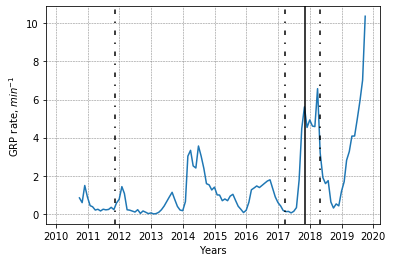

In [33]:
plt.close()
plt.ylabel(r'GRP rate, $min^{-1}$')
plt.xlabel('Years')
plt.plot(result_crab['pase_GP'])
plt.axvline('2011-11-10', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-03-27', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-11-07', color='black') # strongest glitch
plt.axvline('2018-04-29', color='black', ls=(0, (3, 5, 1, 5)))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

## Отрисовка темпа генерации совместно с показателями вписывания диаграммы направленности

In [20]:
coeff_table = pd.read_table('beam_coeff_obs_kaz.csv', sep='\t')

In [21]:
coeff_table

,Date,A,shift,y0,Jy/ADC
0,13.02.2010,299.752556,0.119072,210.750382,5.822553
1,04.09.2010,347.494600,0.097007,100.154814,4.944975
2,05.09.2010,330.253045,-0.111377,123.377004,5.214764
3,06.09.2010,350.387846,0.077762,122.166582,4.912586
4,07.09.2010,257.280328,0.184195,118.349339,6.686779
...,...,...,...,...,...
2080,10.09.2019,20.294635,0.130456,12.689191,85.799973
2081,16.09.2019,20.966289,-0.036010,21.739735,83.637834
2082,17.09.2019,8.598572,0.030083,15.326336,204.362220
2083,18.09.2019,8.235653,-0.004988,15.889990,213.880934


In [22]:
coeff_table['Time_series'] = pd.to_datetime(coeff_table['Date'], format='%d.%m.%Y', errors='ignore')
coeff_table = coeff_table.set_index('Time_series')
coeff_table_m = coeff_table['A'].resample('M').median().to_frame()

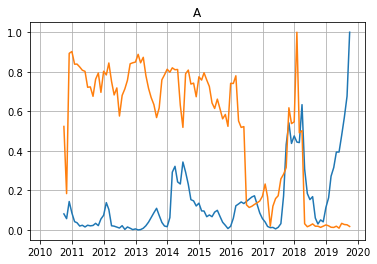

In [23]:
plt.close()
plt.title('A')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(coeff_table_m['A']/np.max(coeff_table_m['A']))
plt.grid()
#plt.xlim('2018-03-01','2019-12-30')
plt.show()

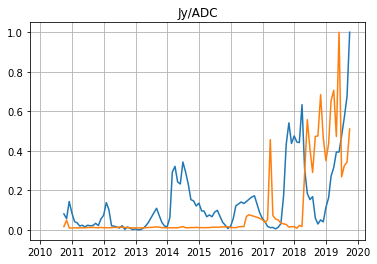

In [24]:
coeff_table_m = coeff_table['Jy/ADC'].resample('M').median().to_frame()
plt.close()
plt.title('Jy/ADC')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(coeff_table_m['Jy/ADC']/np.max(coeff_table_m['Jy/ADC']))
plt.grid()
#plt.xlim('2018-03-01','2019-12-30')
plt.show()

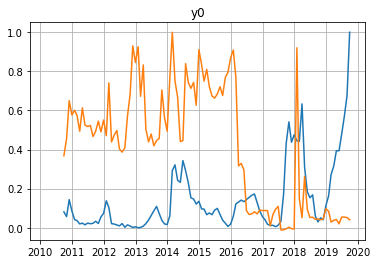

In [25]:
coeff_table_m = coeff_table['y0'].resample('M').median().to_frame()
plt.close()
plt.title('y0')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(coeff_table_m['y0']/np.max(coeff_table_m['y0']))
plt.grid()
#plt.xlim('2018-03-01','2019-12-30')
plt.show()

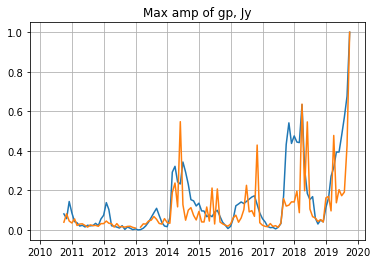

In [26]:
gp_table_amp_of_gp_m = gp_table_full['amp of gp, Jy'].resample('M').max().to_frame()
plt.close()
plt.title('Max amp of gp, Jy')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_amp_of_gp_m['amp of gp, Jy']/np.max(gp_table_amp_of_gp_m['amp of gp, Jy']))
plt.grid()
plt.show()

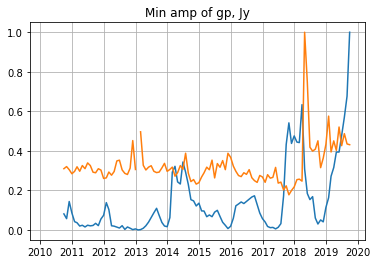

In [27]:
gp_table_amp_of_gp_m = gp_table_full['amp of gp, Jy'].resample('M').min().to_frame()
plt.close()
plt.title('Min amp of gp, Jy')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_amp_of_gp_m['amp of gp, Jy']/np.max(gp_table_amp_of_gp_m['amp of gp, Jy']))
plt.grid()
plt.show()

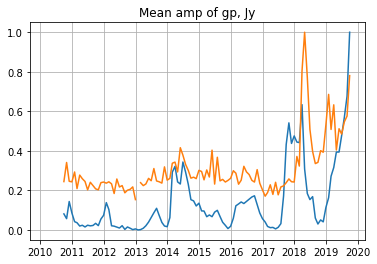

In [28]:
gp_table_amp_of_gp_m = gp_table_full['amp of gp, Jy'].resample('M').mean().to_frame()
plt.close()
plt.title('Mean amp of gp, Jy')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_amp_of_gp_m['amp of gp, Jy']/np.max(gp_table_amp_of_gp_m['amp of gp, Jy']))
plt.grid()
plt.show()

## Перерасчет W10 и W50 для фита импульса полиномом 19 степени.

In [45]:
gp_table_full['W10_19D_poly, point'] = None
gp_table_full['W50_19D_poly, point'] = None

for idx, file in enumerate(gp_table_full['fName']):
    profile = np.genfromtxt(file, skip_header=7)
    normal_pulse = profile/max(profile)
    cor_noise = normal_pulse[:5]
    media = np.median(cor_noise)
    normal_pulse -= media
    normal_pulse = flatter(normal_pulse, polynomialOrder=19)
    
    w10, _, _ = width_of_pulse(normal_pulse, 0.1)
    w50, _, _ = width_of_pulse(normal_pulse, 0.5)
    
    gp_table_full['W10_19D_poly, point'][idx] = w10
    gp_table_full['W50_19D_poly, point'][idx] = w50

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit m

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages

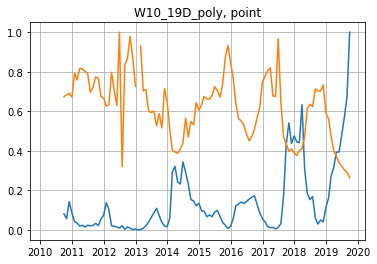

In [47]:
gp_table_full['W50_19D_poly, point'] = pd.to_numeric(gp_table_full['W50_19D_poly, point'])
gp_table_full['W10_19D_poly, point'] = pd.to_numeric(gp_table_full['W10_19D_poly, point'])
gp_table_full_w_m = gp_table_full['W10_19D_poly, point'].resample('M').mean().to_frame()
plt.close()
plt.title('W10_19D_poly, point')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_full_w_m['W10_19D_poly, point']/np.max(gp_table_full_w_m['W10_19D_poly, point']))
plt.grid()
plt.show()

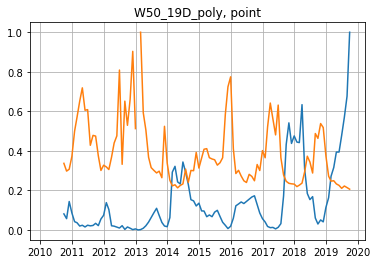

In [48]:
gp_table_full_w_m = gp_table_full['W50_19D_poly, point'].resample('M').mean().to_frame()
plt.close()
plt.title('W50_19D_poly, point')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_full_w_m['W50_19D_poly, point']/np.max(gp_table_full_w_m['W50_19D_poly, point']))
plt.grid()
plt.show()

##  Переоасчет w50 и w10 путем вписывания функции импульса

In [49]:
#  Инициализация функций 
def screan(t, t_s):
    if t < 0:
        return 0
    else:
        return np.exp(-t/t_s)


def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


def my_pulse(x,a,x0,sigma, t_s):
    gs = gauss(x, a, x0, sigma)
    scr = [screan(i, t_s) for i in x] 
    return np.convolve(scr, gs, 'full')[:LEN]

In [50]:
T_SCATTERING = 15.85

In [51]:
gp_table_full['W10_fit_func, point'] = None
gp_table_full['W50_fit_func, point'] = None

for idx, file in enumerate(gp_table_full['fName']):
    profile = np.genfromtxt(file, skip_header=7)
    
    LEN = len(profile)
    
    x = np.linspace(0, LEN, LEN)
    normal_pulse = profile/max(profile)

    amp = 1
    mean = 25
    sigma = 3
    t_s = 10

    p0 = [amp,mean,sigma, t_s]
    
    popt,pcov = curve_fit(my_pulse,x,normal_pulse,p0=p0, maxfev=100000)
    new_pulse = my_pulse(x,*popt)

    w10, _, _ = width_of_pulse(new_pulse, 0.1)
    w50, _, _ = width_of_pulse(new_pulse, 0.5)
    
    gp_table_full['W10_fit_func, point'][idx] = w10
    gp_table_full['W50_fit_func, point'][idx] = w50

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


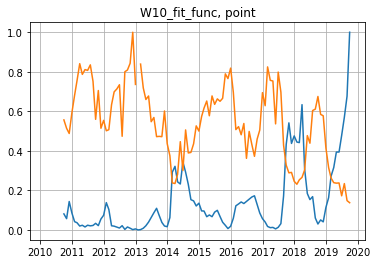

In [52]:
gp_table_full['W50_fit_func, point'] = pd.to_numeric(gp_table_full['W50_fit_func, point'])
gp_table_full['W10_fit_func, point'] = pd.to_numeric(gp_table_full['W10_fit_func, point'])
gp_table_full_w_m = gp_table_full['W10_fit_func, point'].resample('M').mean().to_frame()
plt.close()
plt.title('W10_fit_func, point')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_full_w_m['W10_fit_func, point']/np.max(gp_table_full_w_m['W10_fit_func, point']))
plt.grid()
plt.show()

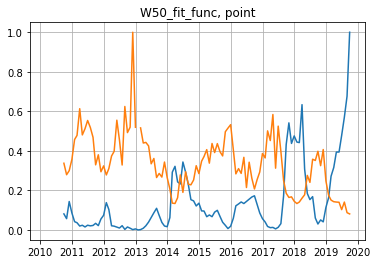

In [53]:
gp_table_full_w_m = gp_table_full['W50_fit_func, point'].resample('M').mean().to_frame()
plt.close()
plt.title('W50_fit_func, point')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_full_w_m['W50_fit_func, point']/np.max(gp_table_full_w_m['W50_fit_func, point']))
plt.grid()
plt.show()

## Анализ W50 и W10 особо выделяющихся импульсов в итоговой(полной таблице)

In [54]:
gp_table_W_anomaly = gp_table_full.where(gp_table_full['New W10, point'] > 147).dropna().reset_index(drop=True)
gp_table_W_anomaly

KeyError: 'New W10, point'

In [ ]:
gp_table_full

In [ ]:
i = 3
file = gp_table_W_anomaly['fName'][i]
profile = np.genfromtxt(file, skip_header=7)
x = range(len(profile))
plt.close()
plt.title(os.path.basename(file))
plt.plot(profile)
plt.text(max(x) - 20, max(profile) - 10, round(gp_table_W_anomaly['New W10, point'][i], 2), fontsize=14)
plt.ylabel('Peak flux density, Jy')
plt.xlabel('N point')
plt.show()

## Анализ супер ярких импульсов в итоговой(полной таблице)

In [20]:
gp_table_real_gp = gp_table_full.where(gp_table_full['amp of gp, Jy'] > 500).dropna().reset_index(drop=True)
gp_table_real_gp

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430.0,34.0,1719.351895,36.852202,./final_dataset/\obs_data_real_calib\09.09.201...,1.0,45640.0,553.959545,19.33275,54.60850,./final_dataset/gp_plot_real_calib/09.09.2010_...,./final_dataset/gp_plot_txt_real_calib/09.09.2...,0.0,0.943958
1,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430.0,34.0,1719.485500,38.623575,./final_dataset/\obs_data_real_calib\12.09.201...,1.0,36629.0,573.799110,19.42215,63.82415,./final_dataset/gp_plot_real_calib/12.09.2010_...,./final_dataset/gp_plot_txt_real_calib/12.09.2...,0.0,0.918246
2,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430.0,34.0,1719.561100,39.385654,./final_dataset/\obs_data_real_calib\17.09.201...,1.0,41855.0,542.719250,18.77400,39.25405,./final_dataset/gp_plot_real_calib/17.09.2010_...,./final_dataset/gp_plot_txt_real_calib/17.09.2...,0.0,0.941536
3,28.09.2010,05:33:59.7273254,2.4576,5.988705,2430.0,34.0,1719.984685,110.603460,./final_dataset/\obs_data_real_calib\28.09.201...,1.0,55908.0,576.251845,6.80930,24.21995,./final_dataset/gp_plot_real_calib/28.09.2010_...,./final_dataset/gp_plot_txt_real_calib/28.09.2...,0.0,0.683963
4,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430.0,34.0,1719.437405,39.210923,./final_dataset/\obs_data_real_calib\17.10.201...,1.0,27361.0,824.364995,21.39640,59.65960,./final_dataset/gp_plot_real_calib/17.10.2010_...,./final_dataset/gp_plot_txt_real_calib/17.10.2...,0.0,0.956081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,14467.0,611.994295,3.62070,38.12165,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.647110
1981,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,64582.0,611.626045,4.15710,10.69820,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.863559
1982,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,8444.0,605.560555,4.69350,18.90810,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.805278
1983,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,44427.0,565.348755,5.15540,11.58475,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.723227


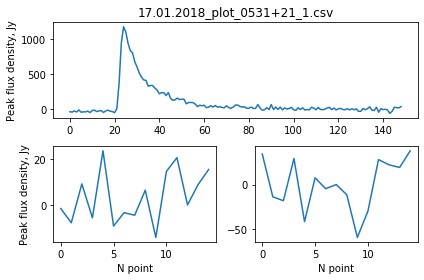

In [84]:

for idx, fname in enumerate(gp_table_real_gp['fName']):
    profile = np.genfromtxt(fname, skip_header=7)
    x = range(len(profile))
    start_noise = profile[:15]
    end_noise = profile[-15:]
    
    plt.close()
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(2, 2)
    plt.figure()
    plt.subplot(gs[0, :])
    plt.title(os.path.basename(fname))
    plt.plot(profile)
    plt.ylabel('Peak flux density, Jy')
    plt.subplot(gs[1, 0])
    plt.plot(start_noise - np.median(start_noise))
    plt.ylabel('Peak flux density, Jy')
    plt.xlabel('N point')
    plt.subplot(gs[1, 1])
    plt.plot(end_noise - np.median(end_noise))
    plt.xlabel('N point')
    plt.tight_layout()
    plt.savefig('./final_dataset/GP_500/' + os.path.basename(fname)[:-4] + '.png', format='png', dpi=150)

## Анализ корреляции амплитуд шума в начале и конце записи, а также амплитуды импульса.

In [21]:
table_param_pulses = pd.DataFrame(columns=['Data', 'ampl', 'start_no', 'end_no'])

for idx, file in enumerate(gp_table_full['fName']):
    profile = np.genfromtxt(file, skip_header=7)
    
    start_noise = profile[:10]
    end_noise = profile[-20:]

    table_param_pulses.loc[idx] = [
        gp_table_full['Date'][idx],
        gp_table_full['amp of gp, Jy'][idx],
        np.std(start_noise),
        np.std(end_noise)
    ]

In [22]:
table_param_pulses

,Data,ampl,start_no,end_no
0,04.09.2010,179.859550,45.263973,32.606699
1,04.09.2010,161.100140,24.392539,40.203118
2,05.09.2010,371.206160,36.230926,34.908885
3,05.09.2010,165.326490,33.131424,24.726435
4,05.09.2010,131.834780,21.295319,34.466197
...,...,...,...,...
9756,19.09.2019,347.426975,45.270603,48.164057
9757,19.09.2019,344.727905,47.171558,59.247898
9758,19.09.2019,323.043405,64.035637,72.700725
9759,19.09.2019,302.876425,59.574463,67.640290


In [29]:
table_param_pulses['Time_series'] = pd.to_datetime(table_param_pulses['Data'], format='%d.%m.%Y', errors='ignore')
table_param_pulses = table_param_pulses.set_index('Time_series')
table_param_pulses_m_ampl = table_param_pulses['ampl'].resample('M').median().to_frame()
table_param_pulses_m_start_no = table_param_pulses['start_no'].resample('M').median().to_frame()
table_param_pulses_m_end_no = table_param_pulses['end_no'].resample('M').median().to_frame()

In [47]:
table_param_pulses['2018-12-01':'2018-12-30']

,Data,ampl,start_no,end_no
Time_series,,,,
2018-12-02,02.12.2018,423.657565,74.810563,72.883559
2018-12-03,03.12.2018,630.248645,110.800407,81.101568
2018-12-04,04.12.2018,830.857110,61.734858,53.322111
2018-12-04,04.12.2018,463.674170,59.367937,95.032416
2018-12-04,04.12.2018,387.558860,46.028087,60.332398
...,...,...,...,...
2018-12-30,30.12.2018,462.792500,77.907549,62.095791
2018-12-30,30.12.2018,410.331230,89.249405,59.950950
2018-12-30,30.12.2018,375.838870,62.687861,83.097032


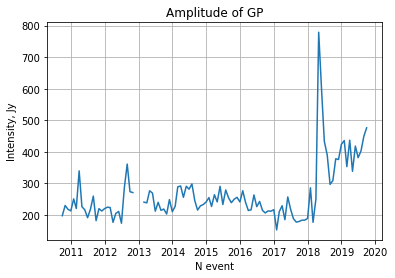

In [30]:
plt.close()
plt.title('Amplitude of GP')
plt.ylabel('Intensity, Jy')
plt.xlabel('N event')
plt.plot(table_param_pulses_m_ampl)
plt.grid()
plt.show()

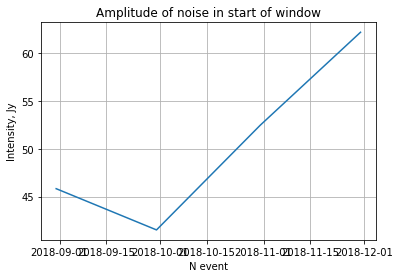

In [43]:
plt.close()
plt.title('Amplitude of noise in start of window')
plt.ylabel('Intensity, Jy')
plt.xlabel('N event')
plt.plot(table_param_pulses_m_start_no['2018-08-01':'2018-12-30'])
plt.grid()
#plt.xlim(2017, 2019)
plt.show()

In [46]:
table_param_pulses_m_start_no['2019-01-01':'2019-01-31']

,start_no
Time_series,
2019-01-31,53.190078


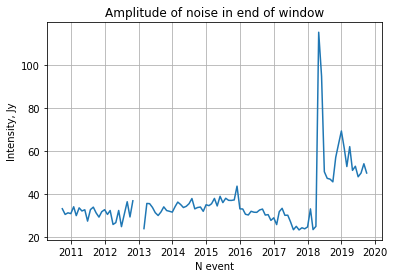

In [32]:
plt.close()
plt.title('Amplitude of noise in end of window')
plt.ylabel('Intensity, Jy')
plt.xlabel('N event')
plt.plot(table_param_pulses_m_end_no)
plt.grid()
plt.show()

In [33]:
table_param_pulses.corr()

,ampl,start_no,end_no
ampl,1.000000,0.414014,0.442723
start_no,0.414014,1.000000,0.840294
end_no,0.442723,0.840294,1.000000


## Добавление колонок с MJD

In [55]:
# Добавление колонки MJD в таблицу ГИ
gp_table_full['MJD'] = None
for index, row in gp_table_full.iterrows():
    day, month, year = row['Date'].split('.')
    time_utc = (Time('{}-{}-{}T'.format(year, month, day) + row['Time start'], precision=7)
            - 4*u.hour
            + row['point of gp, point']*float(row['Tay, ms'])*u.millisecond)
    gp_table_full['MJD'].loc[index] = str(time_utc.mjd)
# Добавление колонки MJD в таблицу сеансов
crab_sessoins['MJD'] = None
for index, row in crab_sessoins.iterrows():
    year, month, day  = str(index).split()[0].split('-')
    time_utc = (Time('{}-{}-{}T'.format(year, month, day) + '00:00:00.0000000', precision=7) - 4*u.hour)
    crab_sessoins['MJD'].loc[index] = str(time_utc.mjd)    

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


##  Расчет энергии и добавление ее в таблицу

In [56]:
# Добавление колонки энергии в таблицу ГИ
gp_table_full['E, Jy*ms']  = (
    gp_table_full['amp of gp, Jy']
    * gp_table_full['W50, point']
    * gp_table_full['Tay, ms']
    / 0.69  # Коэффициент для расчета энергии из рассеяния 
)

In [57]:
# Добавление колонки энергии в таблицу ГИ расчитанную по новым значениям ширины
gp_table_full['E_19D_poly, Jy*ms']  = (
    gp_table_full['amp of gp, Jy']
    * gp_table_full['W50_19D_poly, point']
    * gp_table_full['Tay, ms']
    / 0.69  # Коэффициент для расчета энергии из рассеяния 
)

## Расчет энергии путем вычисления интеграла методом Симпсона

In [58]:
gp_table_full['E_fit_func, Jy*ms'] = None

for idx, file in enumerate(gp_table_full['fName']):
    profile = np.genfromtxt(file, skip_header=7)
    
    LEN = len(profile)
    
    x = np.linspace(0, LEN, LEN)

    amp = max(profile)
    mean = 25
    sigma = 3
    t_s = 10

    p0 = [amp,mean,sigma, t_s]
    
    popt,pcov = curve_fit(my_pulse,x,profile,p0=p0, maxfev=100000)
    new_pulse = my_pulse(x,*popt)

    gp_table_full['E_fit_func, Jy*ms'][idx] = simps(new_pulse)* gp_table_full['Tay, ms'][idx]

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


## Построение распределений по энергиям

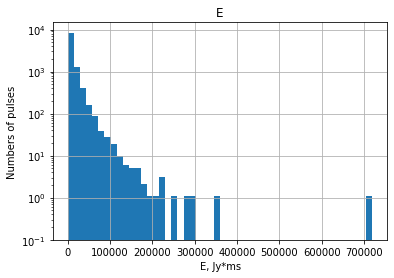

In [62]:
fig, ax = plt.subplots()
gp_table_full['E, Jy*ms'].hist(ax=ax, bins=50, bottom=0.1)
ax.set_title('E')
ax.set_xlabel('E, Jy*ms')
ax.set_ylabel('Numbers of pulses')
ax.set_yscale('log')
#ax.set_xscale('log')

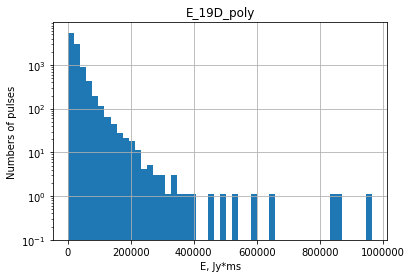

In [63]:
fig, ax = plt.subplots()
gp_table_full['E_19D_poly, Jy*ms'].hist(ax=ax, bins=50, bottom=0.1)
ax.set_title('E_19D_poly')
ax.set_xlabel('E, Jy*ms')
ax.set_ylabel('Numbers of pulses')
ax.set_yscale('log')
#ax.set_xscale('log')

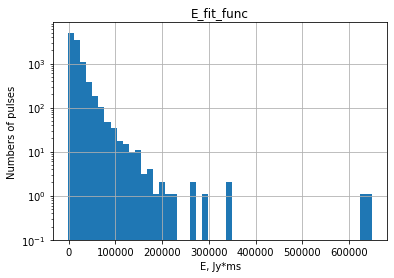

In [65]:
fig, ax = plt.subplots()
gp_table_full['E_fit_func, Jy*ms'].hist(ax=ax, bins=50, bottom=0.1)
ax.set_title('E_fit_func')
ax.set_xlabel('E, Jy*ms')
ax.set_ylabel('Numbers of pulses')
ax.set_yscale('log')
#ax.set_xscale('log')

## Проверка расчета энергии Для шаблонного профиля

15.213115942028988
20.068389889135783


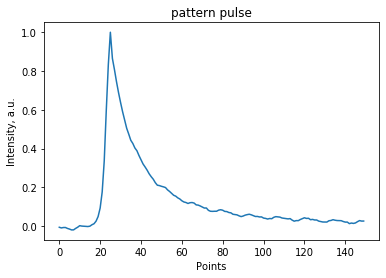

In [163]:
# Подгрузка профиля
fl = np.genfromtxt('./patterns/total_profile.txt')
plt.clf()
plt.title('pattern pulse')
plt.xlabel('Points')
plt.ylabel('Intensity, a.u.')
plt.plot(fl)

w50_fl, _, _ = width_of_pulse(fl, 0.5)
print(max(fl)*w50_fl/0.69)
print(simps(fl))

## Энергия по времени

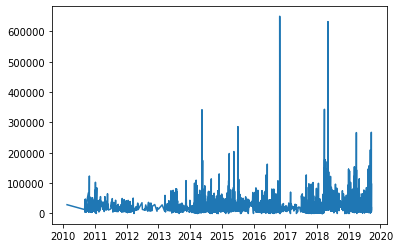

In [66]:
plt.clf()
plt.plot(gp_table_full['E_fit_func, Jy*ms'])
plt.show()

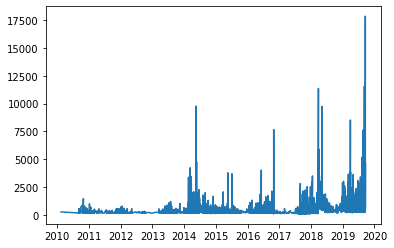

In [67]:
plt.clf()
plt.plot(gp_table_full['amp of gp, Jy'])
plt.show()

## Средняя/минимальная/максимальная энергии с темпом генерации

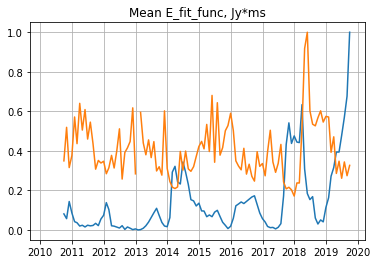

In [68]:
# Средняя
gp_table_full['E_fit_func, Jy*ms'] = pd.to_numeric(gp_table_full['E_fit_func, Jy*ms'])
gp_table_full_E_m = gp_table_full['E_fit_func, Jy*ms'].resample('M').mean().to_frame()
plt.close()
plt.title('Mean E_fit_func, Jy*ms')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_full_E_m['E_fit_func, Jy*ms']/np.max(gp_table_full_E_m['E_fit_func, Jy*ms']))
plt.grid()

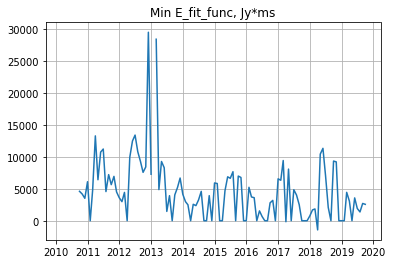

In [69]:
gp_table_full_E_m = gp_table_full['E_fit_func, Jy*ms'].resample('M').min().to_frame()
plt.close()
plt.title('Min E_fit_func, Jy*ms')
#plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_full_E_m['E_fit_func, Jy*ms']) #/np.max(gp_table_full_E_m['E_fit_func, Jy*ms']))
plt.grid()

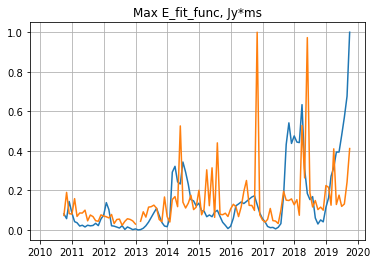

In [71]:
gp_table_full_E_m = gp_table_full['E_fit_func, Jy*ms'].resample('M').max().to_frame()
plt.close()
plt.title('Max E_fit_func, Jy*ms')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_full_E_m['E_fit_func, Jy*ms']/np.max(gp_table_full_E_m['E_fit_func, Jy*ms']))
plt.grid()

## Анализ выделяющихся событий по амплитуде

In [72]:
gp_table_W_anomaly = gp_table_full.where(gp_table_full['amp of gp, Jy'] > 9000).dropna().reset_index(drop=True)
gp_table_W_anomaly

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u",...,zeros_ends,pears,"W10_19D_poly, point","W50_19D_poly, point","W10_fit_func, point","W50_fit_func, point",MJD,"E, Jy*ms","E_19D_poly, Jy*ms","E_fit_func, Jy*ms"
0,17.05.2014,14:20:57.4927177,2.4576,5.998144,2438.0,34.0,1724.448785,109.777587,.\obs_data_real_calib\2014.05.17_obs_0531+21.csv,1.0,...,0.0,0.983146,43.7710,15.1182,30.3622,10.5820,56794.433186008086,350369.016911,525887.461923,341784.946685
1,27.03.2018,17:41:35.3883666,2.4576,6.007553,2442.0,34.0,1798.573820,271.951260,.\obs_data_real_calib\2018.03.27_obs_0531+21.csv,1.0,...,0.0,0.974728,43.2160,15.8138,27.6168,9.1094,58204.571052967134,295226.786378,639454.506837,343171.333847
2,07.05.2018,15:00:23.4933052,2.4576,6.007598,2442.0,34.0,1798.251285,186.808824,.\obs_data_real_calib\2018.05.07_obs_0531+21.csv,1.0,...,0.0,0.942275,89.7842,24.1610,54.7008,18.1818,58245.46071036303,719155.596822,838649.530965,632061.735376
3,07.09.2019,06:57:48.5719451,2.4576,6.009796,2442.0,34.0,1754.046050,120.130589,.\obs_data_real_calib\2019.09.07_obs_0531+21.csv,1.0,...,0.0,0.922517,23.6208,14.1340,16.9090,5.9496,58733.12559590507,196613.602736,581015.003673,209514.541314
4,18.09.2019,06:14:33.6592941,2.4576,6.009857,2442.0,34.0,1751.163685,166.178304,.\obs_data_real_calib\2019.09.18_obs_0531+21.csv,1.0,...,0.0,0.890300,21.9114,13.6456,13.4680,4.7878,58744.09399396627,256015.086812,866771.568584,267419.517632


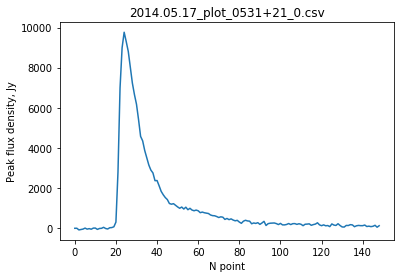

In [73]:
i = 0
file = gp_table_W_anomaly['fName'][i]
profile = np.genfromtxt(file, skip_header=7)
x = range(len(profile))
plt.close()
plt.title(os.path.basename(file))
plt.plot(profile)
plt.ylabel('Peak flux density, Jy')
plt.xlabel('N point')
plt.show()

In [217]:
gp_table_W_anomaly = gp_table_full.where(gp_table_full['amp of gp, Jy'] < 100).dropna().reset_index(drop=True)
gp_table_W_anomaly

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u",...,pears,"W10_19D_poly, point","W50_19D_poly, point","W10_fit_func, point","W50_fit_func, point","E, Jy*ms","New E, Jy*ms","E_19D_poly, Jy*ms","E_fit_func, Jy*ms",MJD
0,05.10.2017,05:05:41.9058532,2.4576,6.005283,2442.0,34.0,1639.039735,21.899758,.\obs_data_real_calib\2017.10.05_obs_0531+21.csv,1.0,...,0.522194,12.8538,12.8538,40.4484,13.5494,3102.580213,54930.652967,4571.317527,3458.272590,58031.046936649895
1,05.10.2017,05:05:41.9058532,2.4576,6.005283,2442.0,34.0,1639.039735,21.899758,.\obs_data_real_calib\2017.10.05_obs_0531+21.csv,1.0,...,0.593982,16.2060,16.2060,42.1874,14.2524,2581.934909,69178.223757,5650.390548,3832.973973,58031.046936649895
2,05.10.2017,05:05:41.9058532,2.4576,6.005283,2442.0,34.0,1639.039735,21.899758,.\obs_data_real_calib\2017.10.05_obs_0531+21.csv,1.0,...,0.667792,13.8380,13.8380,28.0904,9.4424,2996.678437,58871.029193,4536.413495,2803.637329,58031.046936649895
3,05.10.2017,05:05:41.9058532,2.4576,6.005283,2442.0,34.0,1639.039735,21.899758,.\obs_data_real_calib\2017.10.05_obs_0531+21.csv,1.0,...,0.547226,17.6120,17.6120,49.8538,16.4724,1410.239582,74835.274023,5641.022385,3504.915233,58031.046936649895


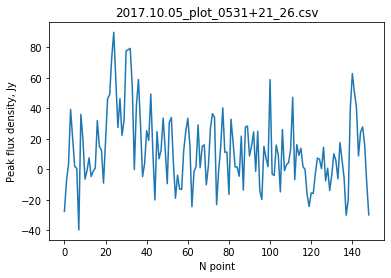

In [218]:
i = 3
file = gp_table_W_anomaly['fName'][i]
profile = np.genfromtxt(file, skip_header=7)
x = range(len(profile))
plt.close()
plt.title(os.path.basename(file))
plt.plot(profile)
plt.ylabel('Peak flux density, Jy')
plt.xlabel('N point')
plt.show()

## Анализ выделяющихся событий по энергии

In [227]:
gp_table_W_anomaly = gp_table_full.where(gp_table_full['E_fit_func, Jy*ms'] > 10000).dropna().reset_index(drop=True)
gp_table_W_anomaly

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u",...,pears,"W10_19D_poly, point","W50_19D_poly, point","W10_fit_func, point","W50_fit_func, point","E, Jy*ms","New E, Jy*ms","E_19D_poly, Jy*ms","E_fit_func, Jy*ms",MJD
0,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430.0,34.0,1744.818640,42.117403,.\obs_data_real_calib\2010.02.13_obs_0531+21.csv,1.0,...,0.572535,33.3888,33.3888,138.0914,44.4222,8077.116900,165277.422432,32034.832898,28898.736309,55240.686525266094
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1717.647895,36.229961,.\obs_data_real_calib\2010.09.04_obs_0531+21.csv,1.0,...,0.738860,34.3582,34.3582,76.9230,25.2044,10696.664216,159952.099069,21617.568980,12872.655848,55443.13131446663
2,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1717.647895,36.229961,.\obs_data_real_calib\2010.09.04_obs_0531+21.csv,1.0,...,0.671775,32.4268,32.4268,128.1532,41.2328,4595.877004,149499.738335,18285.165509,15387.322604,55443.13131446663
3,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1718.033010,41.160847,.\obs_data_real_calib\2010.09.05_obs_0531+21.csv,1.0,...,0.914835,22.0594,22.0594,72.8308,23.8058,17164.515054,115462.485689,32351.377388,28987.203750,55444.12913133242
4,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1718.033010,41.160847,.\obs_data_real_calib\2010.09.05_obs_0531+21.csv,1.0,...,0.513288,22.5034,22.5034,137.2626,55.7368,1706.188468,107624.818253,18275.520758,22147.841116,55444.12913133242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1768.598620,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1.0,...,0.665204,2.4198,2.4198,34.4248,10.0862,7883.236812,14175.562329,5301.278763,16629.462097,58745.092433387574
6231,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1768.598620,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1.0,...,0.639135,34.6838,34.6838,80.2826,23.9390,7346.016911,197114.502494,67189.984660,25383.230501,58745.092433387574
6232,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1768.598620,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1.0,...,0.540843,18.2188,18.2188,38.1692,13.1276,5323.004205,103012.892546,34528.598796,15146.638460,58745.092433387574
6233,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1768.598620,126.952082,.\obs_data_real_calib\2019.09.19_obs_0531+21.csv,1.0,...,0.614616,15.1256,15.1256,21.9040,7.3778,9730.977354,85025.114652,27944.309744,11139.963126,58745.092433387574


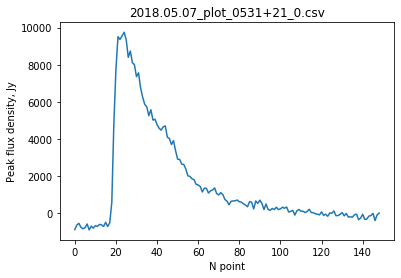

In [194]:
i = 1
file = gp_table_W_anomaly['fName'][i]
profile = np.genfromtxt(file, skip_header=7)
x = range(len(profile))
plt.close()
plt.title(os.path.basename(file))
plt.plot(profile)
plt.ylabel('Peak flux density, Jy')
plt.xlabel('N point')
plt.show()

In [201]:
gp_table_W_anomaly = gp_table_full.where(gp_table_full['E_fit_func, Jy*ms'] < 50).dropna().reset_index(drop=True)
gp_table_W_anomaly

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u",...,pears,"W10_19D_poly, point","W50_19D_poly, point","W10_fit_func, point","W50_fit_func, point","E, Jy*ms","New E, Jy*ms","E_19D_poly, Jy*ms","E_fit_func, Jy*ms",MJD
0,16.01.2011,22:17:34.8730201,2.4576,5.990321,2430.0,34.0,1688.569940,39.085627,.\obs_data_real_calib\2011.01.16_obs_0531+21.csv,1.0,...,0.768955,34.4100,34.4100,22.2740,6.7118,13584.021229,168718.877964,37569.920870,4.995620e-27,55577.762630554476
1,25.03.2012,17:47:18.6993904,2.4576,5.993394,2430.0,34.0,1718.914670,35.203391,.\obs_data_real_calib\2012.03.25_obs_0531+21.csv,1.0,...,0.682225,26.9286,26.9286,10.0122,3.0192,12802.363027,128747.839048,21725.412800,1.833423e-26,56011.575580515244
2,27.08.2013,07:38:54.8167648,2.4576,5.995606,2436.0,34.0,1724.489540,37.768812,.\obs_data_real_calib\2013.08.27_obs_0531+21.csv,1.0,...,0.510290,16.4946,16.4946,79.8682,24.0500,4997.203475,76288.937406,9250.844251,2.054765e-18,56531.15406900974
3,28.03.2014,17:37:32.2883758,2.4576,5.998123,2436.0,34.0,1729.033790,38.277929,.\obs_data_real_calib\2014.03.28_obs_0531+21.csv,1.0,...,0.599994,18.1596,18.1596,14.3486,4.2476,5844.027168,87133.711455,14447.254278,1.042589e-14,56744.56831537028
4,25.08.2014,07:47:47.5233497,2.4576,5.997959,2438.0,34.0,1719.882610,37.238678,.\obs_data_real_calib\2014.08.25_obs_0531+21.csv,1.0,...,0.801609,18.2484,18.2484,11.1222,3.3596,18745.239018,91076.449973,20209.295521,2.590859e-20,56894.16003679255
5,12.09.2014,06:37:01.3376431,2.4576,5.998033,2438.0,34.0,1748.346020,45.865352,.\obs_data_real_calib\2014.09.12_obs_0531+21.csv,1.0,...,0.554130,26.8176,26.8176,19.3806,5.8386,1283.126388,128562.856426,19325.697242,6.296071e-17,56912.10972842954
6,06.11.2014,03:00:46.8257369,2.4576,5.998592,2438.0,34.0,1672.700305,28.940912,.\obs_data_real_calib\2014.11.06_obs_0531+21.csv,1.0,...,0.577427,33.7366,33.7366,148.0000,148.0000,3352.629068,151730.969978,18906.668085,0.000000e+00,56966.960309267655
7,20.11.2014,02:05:44.2262115,2.4576,5.998802,2438.0,34.0,1739.483510,46.329450,.\obs_data_real_calib\2014.11.20_obs_0531+21.csv,1.0,...,0.748932,38.2136,38.2136,21.0604,6.3492,4550.597436,184693.440477,30915.989188,2.829074e-36,56980.92182654589
8,14.02.2015,20:23:40.9520530,2.4576,6.000154,2439.0,34.0,1717.783450,53.295509,.\obs_data_real_calib\2015.02.14_obs_0531+21.csv,1.0,...,0.796662,34.6098,34.6098,0.9324,0.6586,9502.608437,172596.835192,38387.321563,-5.516613e-91,57067.68399661143
9,19.03.2015,18:13:56.2609977,2.4576,6.000438,2439.0,34.0,1725.319260,41.019008,.\obs_data_real_calib\2015.03.19_obs_0531+21.csv,1.0,...,0.526052,44.3038,44.3038,17.7600,5.3502,1338.072194,206341.112452,26792.164535,3.939778e-24,57100.5939475334


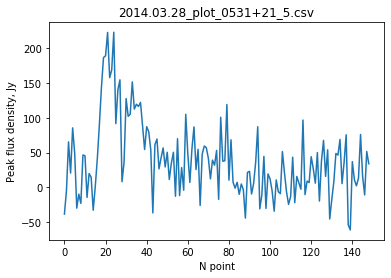

In [204]:
i = 3
file = gp_table_W_anomaly['fName'][i]
profile = np.genfromtxt(file, skip_header=7)
x = range(len(profile))
plt.close()
plt.title(os.path.basename(file))
plt.plot(profile)
plt.ylabel('Peak flux density, Jy')
plt.xlabel('N point')
plt.show()

## Анализ выделяющихся событий по w50

In [207]:
gp_table_W_anomaly = gp_table_full.where(gp_table_full['W50_fit_func, point'] > 140).dropna().reset_index(drop=True)
gp_table_W_anomaly

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u",...,pears,"W10_19D_poly, point","W50_19D_poly, point","W10_fit_func, point","W50_fit_func, point","E, Jy*ms","New E, Jy*ms","E_19D_poly, Jy*ms","E_fit_func, Jy*ms",MJD
0,06.11.2014,03:00:46.8257369,2.4576,5.998592,2438.0,34.0,1672.700305,28.940912,.\obs_data_real_calib\2014.11.06_obs_0531+21.csv,1.0,...,0.577427,33.7366,33.7366,148.0,148.0000,3352.629068,151730.969978,18906.668085,0.000000,56966.960309267655
1,11.07.2016,10:42:48.3187789,2.4576,6.002692,2439.0,34.0,1712.409030,45.502459,.\obs_data_real_calib\2016.07.11_obs_0531+21.csv,1.0,...,0.689251,28.0090,28.0090,148.0,148.0000,6399.565453,130732.756976,18636.552360,0.000000,57580.280984493125
2,20.08.2016,08:05:32.3407745,2.4576,6.002671,2439.0,34.0,1719.858970,39.967654,.\obs_data_real_calib\2016.08.20_obs_0531+21.csv,1.0,...,0.550744,28.3198,28.3198,148.0,148.0000,4431.612201,131833.326620,17584.505080,0.000000,57620.171571279854
3,13.03.2018,18:36:37.9927597,2.4576,6.007478,2442.0,34.0,1722.265350,39.543008,.\obs_data_real_calib\2018.03.13_obs_0531+21.csv,1.0,...,0.520995,148.0000,148.0000,148.0,143.1012,1455.523333,701155.021259,108296.233744,16910.713223,58190.610515770124
4,17.11.2018,02:17:38.9631271,2.4576,6.008188,2442.0,34.0,1756.834015,109.719950,.\obs_data_real_calib\2018.11.17_obs_0531+21.csv,1.0,...,0.558347,47.7818,47.7818,148.0,148.0000,2956.768045,265243.759704,85422.153305,0.000000,58438.930032603006


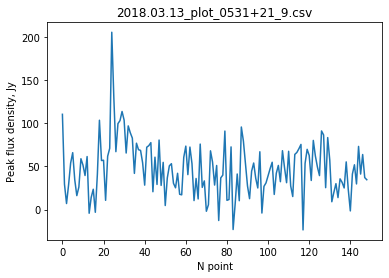

In [208]:
i = 3
file = gp_table_W_anomaly['fName'][i]
profile = np.genfromtxt(file, skip_header=7)
x = range(len(profile))
plt.close()
plt.title(os.path.basename(file))
plt.plot(profile)
plt.ylabel('Peak flux density, Jy')
plt.xlabel('N point')
plt.show()

In [212]:
gp_table_W_anomaly = gp_table_full.where(gp_table_full['W50_fit_func, point'] < 1).dropna().reset_index(drop=True)
gp_table_W_anomaly

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u",...,pears,"W10_19D_poly, point","W50_19D_poly, point","W10_fit_func, point","W50_fit_func, point","E, Jy*ms","New E, Jy*ms","E_19D_poly, Jy*ms","E_fit_func, Jy*ms",MJD
0,14.02.2015,20:23:40.9520530,2.4576,6.000154,2439.0,34.0,1717.783450,53.295509,.\obs_data_real_calib\2015.02.14_obs_0531+21.csv,1.0,...,0.796662,34.6098,34.6098,0.9324,0.6586,9502.608437,172596.835192,38387.321563,-5.516613e-91,57067.68399661143
1,04.08.2015,09:11:22.1148166,2.4576,6.000295,2439.0,34.0,1722.856240,49.109716,.\obs_data_real_calib\2015.08.04_obs_0531+21.csv,1.0,...,0.534686,14.0008,14.0008,0.9324,0.6586,6434.740542,67086.137238,11312.273954,-2.525963e-15,57238.21796275141
2,08.08.2015,08:55:38.5424690,2.4576,6.000295,2439.0,34.0,1704.375320,42.104594,.\obs_data_real_calib\2015.08.08_obs_0531+21.csv,1.0,...,0.649395,16.8276,16.8276,0.9324,0.6586,7124.728469,80853.282876,15026.047385,-1.339999e-106,57242.207074287166
3,01.11.2015,03:21:27.0470561,2.4576,6.000877,2439.0,34.0,1718.123100,49.549096,.\obs_data_real_calib\2015.11.01_obs_0531+21.csv,1.0,...,0.683695,35.0908,35.0908,0.9324,0.6586,10905.563027,169092.322594,30322.966257,-1.514256e-18,57326.97349111574
4,01.03.2017,19:22:48.0184478,2.4576,6.005029,2440.0,34.0,1715.000230,30.678704,.\obs_data_real_calib\2017.03.01_obs_0531+21.csv,1.0,...,0.537863,35.8456,35.8456,0.9324,0.6512,764.435985,162885.539615,17107.330439,-1.592693e+02,57813.64228429885
5,26.11.2017,01:41:15.1204261,2.4576,6.005978,2442.0,34.0,1718.367775,32.282162,.\obs_data_real_calib\2017.11.26_obs_0531+21.csv,1.0,...,0.653332,31.1540,31.1540,0.9324,0.6512,2457.963245,145778.091106,20598.347548,-5.731709e-163,58082.90547216582
6,02.03.2018,19:19:52.8945808,2.4576,6.007393,2442.0,34.0,1719.446490,38.924941,.\obs_data_real_calib\2018.03.02_obs_0531+21.csv,1.0,...,0.591692,16.7906,16.7906,0.0000,0.0000,3808.515421,77807.132966,9934.635072,-1.440472e+03,58179.63986179691
7,22.08.2018,07:59:42.2309188,2.4576,6.007384,2442.0,34.0,1738.604600,54.866940,.\obs_data_real_calib\2018.08.22_obs_0531+21.csv,1.0,...,0.580944,28.4086,28.4086,0.9324,0.6586,7299.908971,140031.711294,27025.502572,-2.001389e-37,58352.16870635356
8,08.01.2019,22:49:16.2708854,2.4576,6.009067,2442.0,34.0,1770.620745,99.191655,.\obs_data_real_calib\2019.01.08_obs_0531+21.csv,1.0,...,0.522796,29.5926,29.5926,0.9324,0.6512,3136.397723,157911.232959,42231.447279,-5.933213e-15,58491.78580366799
9,04.04.2019,17:11:08.9114999,2.4576,6.009940,2442.0,34.0,1751.218305,61.176517,.\obs_data_real_calib\2019.04.04_obs_0531+21.csv,1.0,...,0.547139,11.7512,11.7512,0.9324,0.6512,7026.223162,60157.581925,13888.169017,-8.387524e-295,58577.55156956547


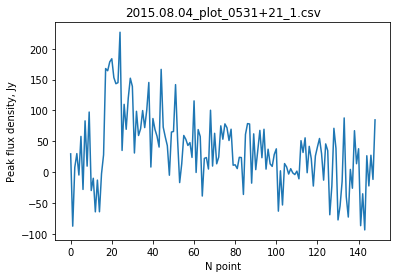

In [214]:
i = 1
file = gp_table_W_anomaly['fName'][i]
profile = np.genfromtxt(file, skip_header=7)
x = range(len(profile))
plt.close()
plt.title(os.path.basename(file))
plt.plot(profile)
plt.ylabel('Peak flux density, Jy')
plt.xlabel('N point')
plt.show()

## Анализ таблицы с отсечкой по энергии

In [74]:
gp_table_E_cut = gp_table_full.where(
    gp_table_full['E_fit_func, Jy*ms'] > 10000).dropna().reset_index()
gp_table_E_cut['Time_series'] = pd.to_datetime(
    gp_table_E_cut['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_E_cut = gp_table_E_cut.set_index('Time_series')

In [75]:
gp_table_E_cut_m = gp_table_E_cut['Count of GP, u'].resample('M').sum().to_frame()
result_crab = gp_table_E_cut_m.join(gp_crab_m_ses, how='outer')

In [76]:
result_crab['pase_GP']  = np.divide(
    result_crab['Count of GP, u'], 
    result_crab['Session']*3.3841152) # в минутах

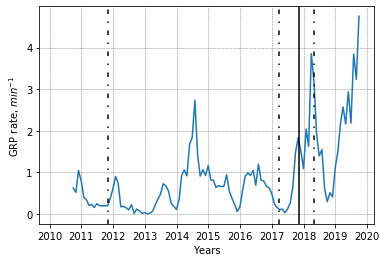

In [77]:
plt.close()
plt.ylabel(r'GRP rate, $min^{-1}$')
plt.xlabel('Years')
plt.plot(result_crab['pase_GP'])
plt.axvline('2011-11-10', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-03-27', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-11-07', color='black') # strongest glitch
plt.axvline('2018-04-29', color='black', ls=(0, (3, 5, 1, 5)))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

## Выделение и упорядочивание колонок для сохранения

In [78]:
gp_pulses_to_save = gp_table_full[['Date',
                                   'Time start',
                                   'MJD',
                                   'Median, Jy',
                                   'amp of gp, Jy',
                                   'W50, point',
                                   'W10, point',
                                   'W50_19D_poly, point',
                                   'W10_19D_poly, point',
                                   'W50_fit_func, point',
                                   'W10_fit_func, point',
                                   'E_19D_poly, Jy*ms',
                                   'E_fit_func, Jy*ms',
                                   'Tay, ms',
                                   'STD, Jy',]]

In [79]:
crab_sessoins_to_save = crab_sessoins[[
    'Date',
    'MJD',
    'Session'
]]

In [80]:
NOW = datetime.datetime.now().strftime("%Y-%m-%d")
gp_pulses_to_save.to_csv(f'crab_gp_kaz_pulses_{NOW}.csv',  sep='\t', header=True, index=False)
crab_sessoins_to_save.to_csv(f'crab_session_kaz_{NOW}.csv',  sep='\t', header=True, index=False)

## Совместная отрисовка энергии с темпом генерации и другими параметрами

In [59]:
gp_table_full_m_energy = gp_table_full['New E, Jy*ms'].resample('M').mean().to_frame()

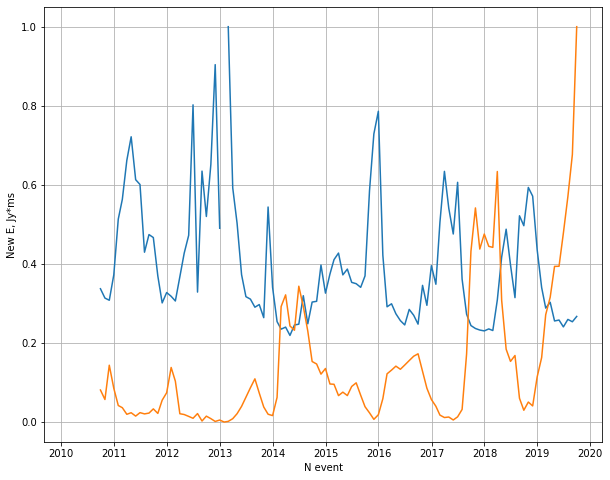

In [60]:
plt.close()
plt.figure(figsize=(10, 8))
plt.ylabel('New E, Jy*ms')
plt.xlabel('N event')
plt.plot(gp_table_full_m_energy['New E, Jy*ms']/np.max(gp_table_full_m_energy['New E, Jy*ms']))
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.grid()
plt.show()

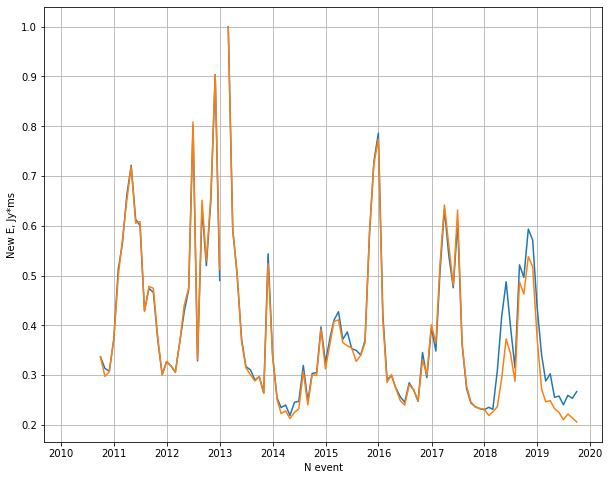

In [61]:
plt.close()
plt.figure(figsize=(10, 8))
plt.ylabel('New E, Jy*ms')
plt.xlabel('N event')
plt.plot(gp_table_full_m_energy['New E, Jy*ms']/np.max(gp_table_full_m_energy['New E, Jy*ms']))
plt.plot(gp_table_full_w_m['New W50, point']/np.max(gp_table_full_w_m['New W50, point']))
plt.grid()
plt.show()

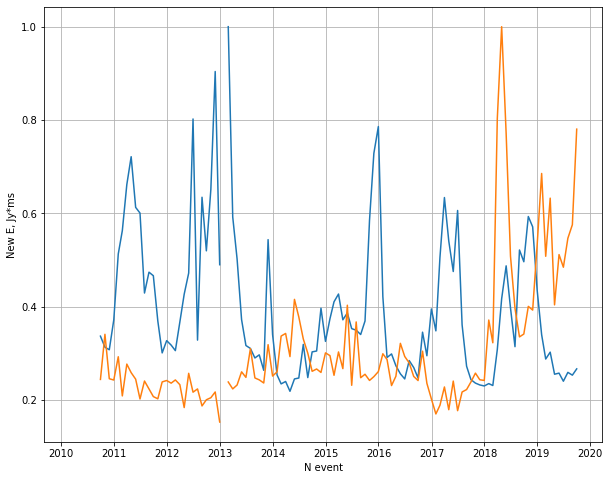

In [62]:
plt.close()
plt.figure(figsize=(10, 8))
plt.ylabel('New E, Jy*ms')
plt.xlabel('N event')
plt.plot(gp_table_full_m_energy['New E, Jy*ms']/np.max(gp_table_full_m_energy['New E, Jy*ms']))
plt.plot(gp_table_amp_of_gp_m['amp of gp, Jy']/np.max(gp_table_amp_of_gp_m['amp of gp, Jy']))
plt.grid()
plt.show()

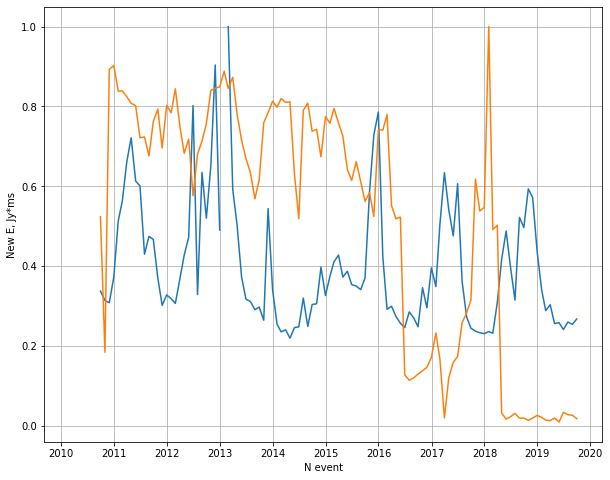

In [64]:
coeff_table_m = coeff_table['A'].resample('M').median().to_frame()
plt.close()
plt.figure(figsize=(10, 8))
plt.ylabel('New E, Jy*ms')
plt.xlabel('N event')
plt.plot(gp_table_full_m_energy['New E, Jy*ms']/np.max(gp_table_full_m_energy['New E, Jy*ms']))
plt.plot(coeff_table_m['A']/np.max(coeff_table_m['A']))
plt.grid()
plt.show()

## Отрисовка импульсов из финальной таблицы для проверки

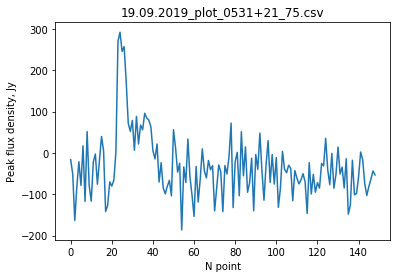

In [28]:
for idx, file in enumerate(gp_table_full['fName']):
    profile = np.genfromtxt(file, skip_header=7)
    plt.close()
    plt.title(os.path.basename(file))
    plt.plot(profile)
    plt.ylabel('Peak flux density, Jy')
    plt.xlabel('N point')
    plt.savefig(f'.\\final_dataset\\gp_plot_final_real_calib\\{idx}.png', format='png')

## Отрисовка изображений для постера в черно-фиолетовой гамме

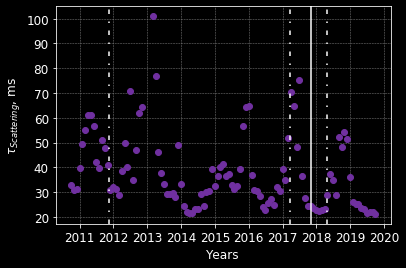

In [41]:
COLOR = 'white'
plt.close()
fig = plt.Figure()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR

plt.plot(gp_table_full['New W50, point'].resample('M').mean().to_frame()*1.44, 'o', color='#7030A0')
plt.axvline('2011-11-10', color='w', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-03-27', color='w', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-11-07', color='w') # strongest glitch
plt.axvline('2018-04-29', color='w', ls=(0, (3, 5, 1, 5)))
plt.ylabel(r'$\tau_{Scattering}$, ms')
plt.xlabel('Years')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('gp_scatter.png', format='png', dpi=300, facecolor=fig.get_facecolor())

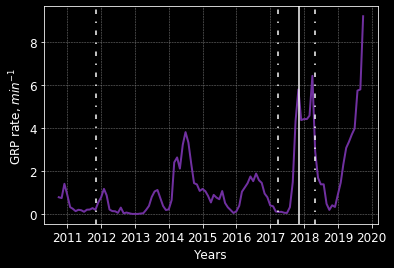

In [31]:
COLOR = 'white'
plt.close()
fig = plt.Figure()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR

plt.close()
plt.ylabel(r'GRP rate, $min^{-1}$')
plt.xlabel('Years')
plt.plot(result_crab['pase_GP'], color='#7030A0', lw=2)
plt.axvline('2011-11-10', color='w', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-03-27', color='w', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-11-07', color='w') # strongest glitch
plt.axvline('2018-04-29', color='w', ls=(0, (3, 5, 1, 5)))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('gp_rate.png', format='png', dpi=300, facecolor=fig.get_facecolor())
#plt.plot()